In [15]:
import qiime2 as q2 
import pandas as pd
import numpy as np
import scipy.stats as ss
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import biom

from qiime2.plugins import diversity, feature_table

## load data 

In [2]:
full_table = q2.Artifact.load('../Updated_Data/final_tables/full_table.qza').view(biom.Table)
gg2_tree = q2.Artifact.load('../Updated_Data/2022.10.phylogeny.asv.nwk.qza')
metadata = pd.read_csv('../Updated_Data/final_tables/metadata_full.tsv', sep='\t', index_col=0)
data_dict_16s = {
    'ANX': full_table.filter(metadata.loc[(metadata['DX_ANX']) | 
                                          (metadata['DX_HC'])].index, inplace=False),
    'ANX_ONLY': full_table.filter(metadata.loc[(metadata['DX_ANX']) & (~metadata['DX_MDD'])].index, inplace=False),
    'MDD': full_table.filter(metadata.loc[metadata['DX_MDD']].index, inplace=False),
    'MDD_ONLY': full_table.filter(metadata.loc[(~metadata['DX_ANX']) & (metadata['DX_MDD'])].index, inplace=False), 
    'ANX_OR_MDD': full_table.filter(metadata.loc[(metadata['DX_ANX']) | (metadata['DX_MDD'])].index, inplace=False),
    'ANX_AND_MDD': full_table.filter(metadata.loc[(metadata['DX_ANX']) & (metadata['DX_MDD'])].index, inplace=False)
}

In [3]:
def alpha(table, metric, phylogeny= None):
    if metric == "faith_pd":
        alpha_vector = diversity.pipelines.alpha_phylogenetic(table=table, phylogeny=phylogeny,
                                                              metric='faith_pd').alpha_diversity
    else:
        alpha_vector = diversity.pipelines.alpha(table=table, metric=metric).alpha_diversity
    
    return alpha_vector.view(pd.Series) 
    
def concat_and_compare_groups(table_dict, metric, metadata, phylogeny=None):
    list_of_subsets = []
    for i in table_dict:
        table = q2.Artifact.import_data('FeatureTable[Frequency]', table_dict[i])
        metadata[metric]= alpha(table, metric, phylogeny)
        subset = metadata.loc[metadata[metric].notna()]
        subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')
        list_of_subsets.append(subset[[metric, 'Subset']]) 
    concatted= pd.concat(list_of_subsets)
    hc = concatted.loc[concatted['Subset'] == "HealthyControl"]
    not_hc = concatted.loc[concatted['Subset'] != "HealthyControl"]
    hc = hc[~hc.index.duplicated()]
    return pd.concat([hc, not_hc])

In [30]:
for met in ['faith_pd', 'shannon']:  
    if met == 'faith_pd':
        alpha_results = concat_and_compare_groups(data_dict_16s, met, metadata, gg2_tree)
    else:
        alpha_results = concat_and_compare_groups(data_dict_16s, met, metadata)
    alpha_results.to_csv('../Updated_Results/' + met + '_results.csv')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/044b6084-c555-4a6e-9ab1-2ea3829dae64/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-7_f4ktxq



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_78530/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/8f93a82b-c59a-4bc5-ba2b-99eee74c74a2/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-ekgac9u1



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_78530/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/cfe6d166-6ab7-4ca7-afd0-2591bda8b8e3/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-7g_h6ta4



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_78530/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/b02786af-1836-490c-80fd-aaca6d10b84c/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-rakrzje3



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_78530/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/30508596-9a96-40cc-9461-1e01fd9d8477/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-33usqg6s



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_78530/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/16ccfae7-0c1e-44ff-9381-89a4e58f0908/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-g2nm8lj5



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_78530/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')
/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_78530/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')
/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_78530/4

In [82]:
faith = pd.read_csv('../Updated_Results/faith_pd_results.csv', index_col=0)
shannon = pd.read_csv('../Updated_Results/shannon_results.csv', index_col=0)

In [83]:
unique_indiv_faith = faith.loc[~faith.index.duplicated()]
unique_indiv_shannon = shannon.loc[~shannon.index.duplicated()]

metadata = pd.read_csv('../Updated_Data/final_tables/metadata_full.tsv', sep='\t', index_col=0)

In [84]:
antidepressants_faith = unique_indiv_faith.loc[metadata['medication_antidepressants'] == 'Antidepressants']
anxiolytics_faith = unique_indiv_faith.loc[metadata['medication_anxiolytics'] == 'Anxiolytics']
unmedicated_faith = unique_indiv_faith.loc[(metadata['medication_anxiolytics'] == 'Unmedicated') &
                                           (metadata['medication_antidepressants'] == 'Unmedicated')]
both_faith = unique_indiv_faith.loc[(metadata['medication_anxiolytics'] == 'Anxiolytics') &
                                    (metadata['medication_antidepressants'] == 'Antidepressants')]

antidepressants_faith['medications'] = 'Antidepressants'
anxiolytics_faith['medications'] = 'Anxiolytics'
unmedicated_faith['medications'] = 'Unmedicated'
both_faith['medications'] = 'Antidepressants&Anxiolytics'

antidepressants_shannon = unique_indiv_shannon.loc[metadata['medication_antidepressants'] == 'Antidepressants']
anxiolytics_shannon = unique_indiv_shannon.loc[metadata['medication_anxiolytics'] == 'Anxiolytics']
unmedicated_shannon = unique_indiv_shannon.loc[(metadata['medication_anxiolytics'] == 'Unmedicated') &
                                           (metadata['medication_antidepressants'] == 'Unmedicated')]
both_shannon = unique_indiv_shannon.loc[(metadata['medication_anxiolytics'] == 'Anxiolytics') &
                                    (metadata['medication_antidepressants'] == 'Antidepressants')]

antidepressants_shannon['medications'] = 'Antidepressants'
anxiolytics_shannon['medications'] = 'Anxiolytics'
unmedicated_shannon['medications'] = 'Unmedicated'
both_shannon['medications'] = 'Antidepressants&Anxiolytics'

faith_medications = pd.concat([antidepressants_faith, anxiolytics_faith, unmedicated_faith, both_faith])
shannon_medications = pd.concat([antidepressants_shannon, anxiolytics_shannon, unmedicated_shannon, both_shannon])

/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_27023/1417040566.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  antidepressants_faith['medications'] = 'Antidepressants'
/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_27023/1417040566.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anxiolytics_faith['medications'] = 'Anxiolytics'
/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_27023/1417040566.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [85]:
faith_sex = unique_indiv_faith[['faith_pd']].merge(metadata[['Gender']], right_index=True, left_index=True)
shannon_sex = unique_indiv_shannon[['shannon']].merge(metadata[['Gender']], right_index=True, left_index=True)
faith_cohort = unique_indiv_faith[['faith_pd']].merge(metadata[['cobre']], right_index=True, left_index=True)
shannon_cohort = unique_indiv_shannon[['shannon']].merge(metadata[['cobre']], right_index=True, left_index=True)

In [86]:
'''
def get_significance(df, col_name, other_groups, ref_group): 
    out_df = pd.DataFrame(index=data_dict_16s.keys(), columns=['U_statistic', 'p_value'])
    for k in data_dict_16s: 
        mwu = ss.mannwhitneyu(df.loc[df.Subset == k][col_name], 
                              df.loc[df.Subset == 'HealthyControl'][col_name])
        out_df['U_statistic'][k] = mwu[0]
        out_df['p_value'][k] = np.round(mwu[1], 3)
    return out_df
'''

def get_significance(df, col_name, other_groups, ref_group, group_col_name='Subset'): 
    out_df = pd.DataFrame(index=other_groups, columns=['U_statistic', 'p_value'])
    for k in other_groups: 
        mwu = ss.mannwhitneyu(df.loc[df[group_col_name] == k][col_name], 
                              df.loc[df[group_col_name] == ref_group][col_name])
        out_df['U_statistic'][k] = mwu[0]
        out_df['p_value'][k] = np.round(mwu[1], 3)
    return out_df

In [87]:
faith_diag = get_significance(faith, 'faith_pd', data_dict_16s.keys(), 'HealthyControl')
faith_diag.index = ['HC_vs_' + i for i in faith_diag.index]
faith_diag = faith_diag.reset_index()
faith_diag['metric'] = 'faith_pd'

shannon_diag = get_significance(shannon, 'shannon', data_dict_16s.keys(), 'HealthyControl')
shannon_diag.index = ['HC_vs_' + i for i in shannon_diag.index]
shannon_diag = shannon_diag.reset_index()
shannon_diag['metric'] = 'shannon'

faith_sex = get_significance(faith_sex, 'faith_pd', ['Female'], 'Male', 'Gender')
faith_sex.index = ['Gender']
faith_sex = faith_sex.reset_index()
faith_sex['metric'] = 'faith_pd'

shannon_sex = get_significance(shannon_sex, 'shannon', ['Female'], 'Male', 'Gender')
shannon_sex.index = ['Gender']
shannon_sex = shannon_sex.reset_index()
shannon_sex['metric'] = 'shannon'

faith_cohort = get_significance(faith_cohort, 'faith_pd', ['No'], 'Yes', 'cobre')
faith_cohort.index = ['Cohort']
faith_cohort = faith_cohort.reset_index()
faith_cohort['metric'] = 'faith_pd'

shannon_cohort = get_significance(shannon_cohort, 'shannon', ['No'], 'Yes', 'cobre')
shannon_cohort.index = ['Cohort']
shannon_cohort = shannon_cohort.reset_index()
shannon_cohort['metric'] = 'shannon'

faith_medications = get_significance(faith_medications, 'faith_pd', 
                                       ['Anxiolytics', 'Antidepressants', 'Antidepressants&Anxiolytics'], 
                                        'Unmedicated', 'medications')
faith_medications.index = ['Unmedicated_vs_' + i  for i in faith_medications.index]
faith_medications = faith_medications.reset_index()
faith_medications['metric'] = 'faith_pd'

shannon_medications = get_significance(shannon_medications, 'shannon', 
                                       ['Anxiolytics', 'Antidepressants', 'Antidepressants&Anxiolytics'], 
                                        'Unmedicated', 'medications')
shannon_medications.index = ['Unmedicated_vs_' + i for i in shannon_medications.index]
shannon_medications = shannon_medications.reset_index()
shannon_medications['metric'] = 'shannon'

alpha_results = pd.concat([faith_diag, shannon_diag, faith_sex, shannon_sex, faith_cohort, shannon_cohort, 
                           faith_medications, shannon_medications])
alpha_results = alpha_results.reset_index(drop=True)
alpha_results.rename(columns={'index': 'comparison', 'p_value': 'p_value_uncorrected'}, inplace=True)
alpha_results.to_csv('../Updated_Results/alpha_diversity_statistics.csv')

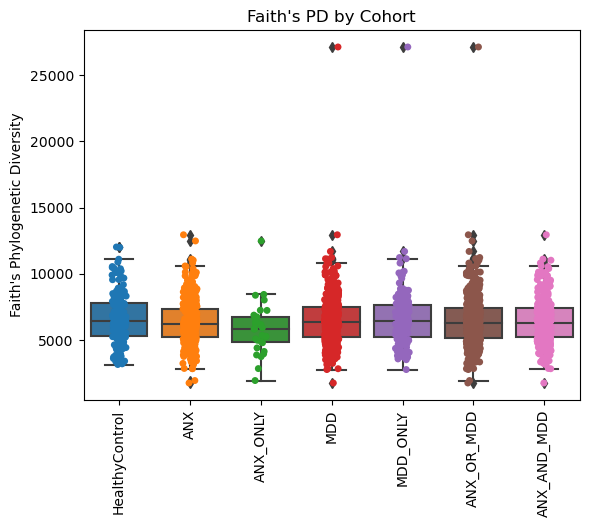

In [88]:
sns.stripplot(data=faith, x='Subset', y="faith_pd", hue='Subset')
sns.boxplot(data=faith, x='Subset', y='faith_pd')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel("Faith's Phylogenetic Diversity")
plt.title("Faith's PD by Cohort")
plt.legend([],[], frameon=False)

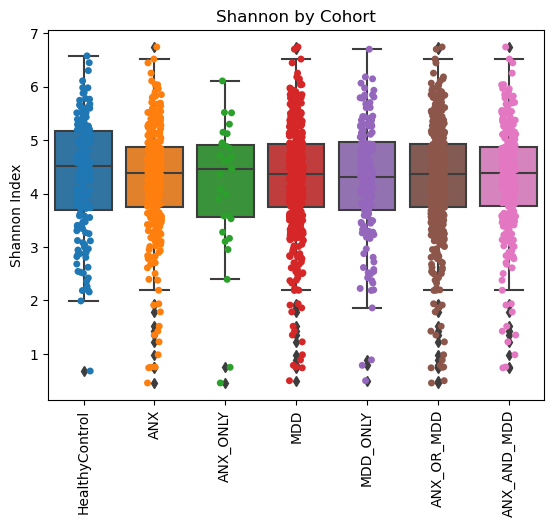

In [89]:
sns.stripplot(data=shannon, x='Subset', y='shannon', hue='Subset')
sns.boxplot(data=shannon, x='Subset', y='shannon')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel("Shannon Index")
plt.title("Shannon by Cohort")
plt.legend([],[], frameon=False)

In [90]:
alpha_results

,comparison,U_statistic,p_value_uncorrected,metric
0,HC_vs_ANX,25023.0,0.143,faith_pd
1,HC_vs_ANX_ONLY,1874.0,0.021,faith_pd
2,HC_vs_MDD,36839.0,0.378,faith_pd
3,HC_vs_MDD_ONLY,13690.0,0.777,faith_pd
4,HC_vs_ANX_OR_MDD,38713.0,0.252,faith_pd
5,HC_vs_ANX_AND_MDD,23149.0,0.268,faith_pd
6,HC_vs_ANX,26021.0,0.423,shannon
7,HC_vs_ANX_ONLY,2329.0,0.461,shannon
8,HC_vs_MDD,36918.0,0.4,shannon
9,HC_vs_MDD_ONLY,13226.0,0.419,shannon
